In [1]:

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Quick exploration
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

# Check for missing values
print("\nMissing Values in Customers:")
print(customers.isnull().sum())
print("\nMissing Values in Products:")
print(products.isnull().sum())
print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())

# Convert dates to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

<ipython-input-2-28e4bbbcfd89>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


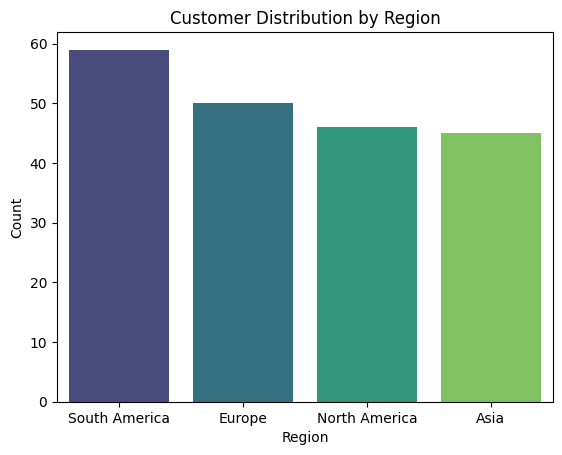

In [2]:
# EDA: Customer distribution by region
region_counts = customers['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

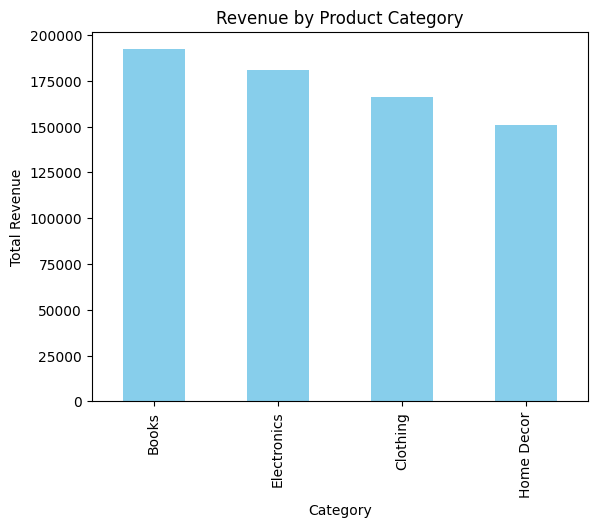

In [3]:
# EDA: Revenue by product category
merged_data = transactions.merge(products, on='ProductID')
revenue_by_category = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

revenue_by_category.plot(kind='bar', title='Revenue by Product Category', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()

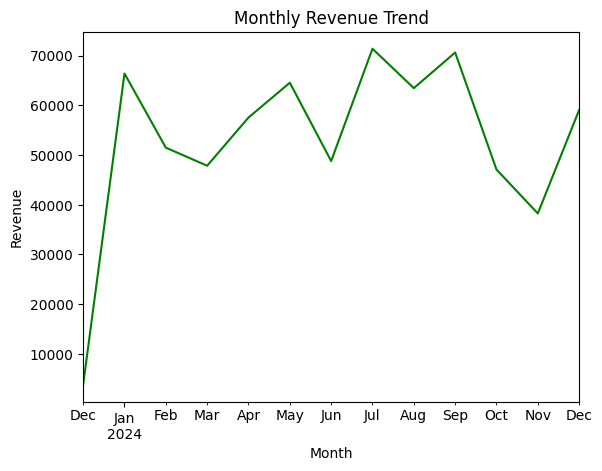

In [4]:
# EDA: Monthly revenue trends
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_revenue = transactions.groupby('Month')['TotalValue'].sum()

monthly_revenue.plot(kind='line', title='Monthly Revenue Trend', color='green')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

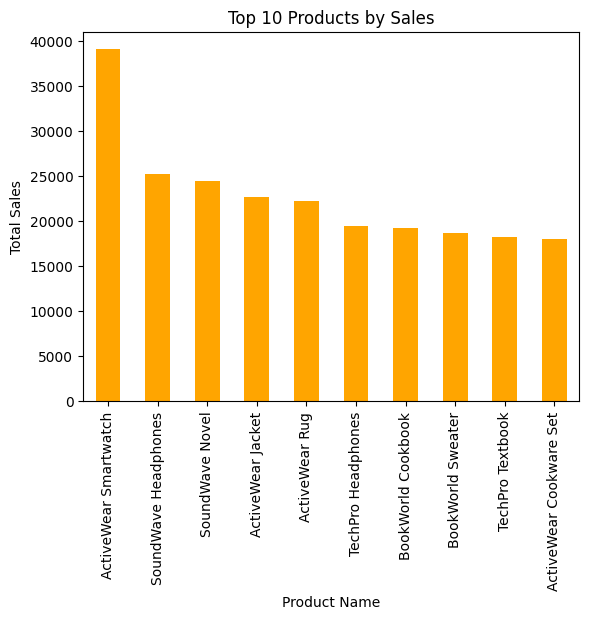

In [5]:
# EDA: Top 10 products by sales
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='bar', title='Top 10 Products by Sales', color='orange')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.show()

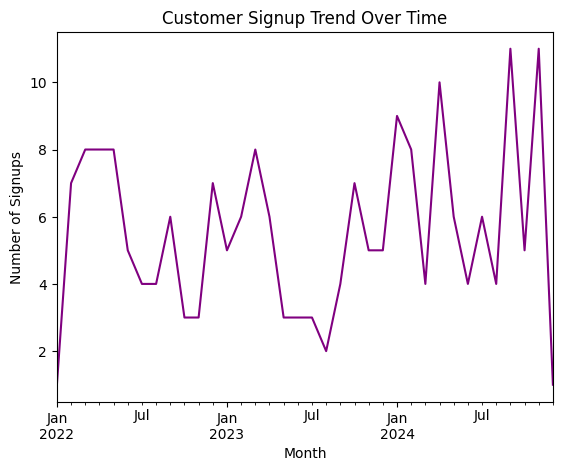


EDA Completed Successfully!


In [6]:
# EDA: Signup trend of customers over time
signup_trend = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()

signup_trend.plot(kind='line', title='Customer Signup Trend Over Time', color='purple')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.show()

# Save the cleaned and merged datasets for further tasks
merged_data.to_csv('Merged_Transactions_Products.csv', index=False)

print("EDA Completed Successfully!")